# Clustering with K-means

compétences: c1 c2 c3 c4 c5 c20
Keywords: Unsupervised Learning, Clustering, Kmeans.

## Description

Découvrir l'apprentissage non-supervisé au travers de l'algorithme K-means.

## Contexte

L'apprentissage supervisé se présente comme une approche de l'apprentissage automatique qui permet de découvrir la structure sous-jacente des données en l'absence d'étiquetage, c'est à dire sans catégories ou classe connue en avance.

Afin de se familiariser avec cette approche et mieux l'appréhender pour l'utiliser dans des scénario plus complexe, les objectifs sont les suivants : 
* Nous souhaitons comprendre le principe de cette technique et les scénarios d'utilisation
* Expérimenter et évaluer un algorithme de cet classe de problème d'apprentissage : les  K-moyennes (ou K-means) sur un jeu de données simple.
* Comprendre et comparer les métrique d'évaluation en jeux
* tester sur des jeux précédemment utilisé de classification, la capacité de l'algorithme à retrouver les catégories de prédiction.


## Ressources

* https://le-datascientist.fr/apprentissage-supervise-vs-non-supervise
* https://realpython.com/k-means-clustering-python/#writing-your-first-k-means-clustering-code-in-python
* (fr) https://mrmint.fr/algorithme-k-means
* https://scikit-learn.org/stable/modules/clustering.html#clustering
* https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

## Questions de cours:  
* Qu'est ce que le clustering ?  
Le clustering (Regroupement) **consiste à séparer un ensemble de données en un certain nombre de groupes**. Chaque données appartenant aux mêmes groupes se "ressemblent" davantage que ceux d’autres groupes.  

Il existe deux types de clustering :

    Le clustering hiérarchique (comme le K-means)
    Le clustering non-hiérarchique (partitionnement)
    
**Qu’est ce que K-means ?**  
K-Means est l'un des **algorithmes utilisés pour le clustering non hiérarchique**. On donne en paramètre d'entré un nombre de groupe dans lesquelles les données seront répartie. L'algorithme va alors créer un "centre" par groupe autour duquel les données similaires seront regroupé. Les centres sont déterminés par approche successive: Au début on place les centres au hasard, puis on calcule les distances données-centre puis on déplace les centres en recherchant les "distances minimum". Par itération successive on trouvera le centre du nuage de point. Attention: Le centre doit appartenir au nuage de point.    
Source Machine Learnia vidéo 24 https://www.youtube.com/watch?v=FTtzd31IAOw  

Cet algorithme n'est pas adapté au morphologie de points qui n'incluerai pas le centre (comme un tore).

* Est ce un probleme difficile ? pourquoi ?


* Quelle est la compléxité d'un probléme de clustering ?  
Souvent, **la complexité du clustering ne dépasse pas O(n.log(n))** ou peut même être linéaire. Il peut être utilisé pour réduire la complexité d'autres algorithmes.  
Par exemple pour la détection des K plus proches voisins (qui est de complexité O(n^2)) le clustering peut être effectué en amont regroupant les éléments les plus similaires dans des paniers. L'algo des K-plus proches voisins peut ensuite être lancé dans chaque cluster réduisant quadratiquement le temps d’exécution.  
Si la taille maximale d’un cluster est d’ordre de √n, le calcul des K-plus proches voisins peut devenir une tâche exécutée en O(n) au lieu de O(n^2), rendant cette tâche possible même dans le cadre d’un grand volume de données.  
source: http://www.novagen.tech/clustering-cas-usage-subtilites/  

* Quelle sont les métrique utilisé pour le clustering ?  
**Inertia**  
La valeur finale du critère d'inertie (somme des carrés des distances au centroïde le plus proche pour toutes les observations de l'ensemble d'entraînement).  
  
**Homogeneity (metrics.homogeneity_score)** "given a ground truth"  
Mesure de l'homogénéité d'un cluster par rapport à la réalité terrain.  
  
Un résultat de regroupement satisfait à l'homogénéité si tous ses regroupements ne contiennent que des points de données qui appartiennent à une seule classe.  
  
Cette métrique est indépendante des valeurs absolues des étiquettes : une permutation des valeurs des étiquettes de classe ou de cluster ne changera en rien la valeur du point.  
  
Cette métrique n'est pas symétrique : la permutation de label_true avec label_pred renverra le score de complétude qui sera différent en général.  
  

**Completeness (metrics.completeness_score)** "given a ground truth"  
Mesure de l'exhaustivité d'un étiquetage de cluster par rapport à la réalité.  
  
Un résultat de regroupement satisfait à l'exhaustivité si tous les points de données qui font partie d'une classe donnée sont des éléments du même regroupement.

Cette métrique est indépendante des valeurs absolues des étiquettes.  
  
Cette métrique n'est pas symétrique.  
  
**V-measure (metrics.v_measure_score)** "given a ground truth"  
L'étiquetage des grappes par mesure V a donné une vérité de base.

Ce score est identique au score normalisé de l'information mutuelle avec l'option "arithmétique" pour le calcul de la moyenne.

La mesure V est la moyenne harmonique entre l'homogénéité et l'exhaustivité :

v = (1 + bêta) * homogénéité * complétude
     / (bêta * homogénéité + exhaustivité)

Cette mesure est indépendante des valeurs absolues des étiquettes : une permutation des valeurs des étiquettes de classe ou de grappe ne changera en rien la valeur du score.

Cette métrique est en outre symétrique : la permutation de label_true avec label_pred renvoie la même valeur de score. Cela peut être utile pour mesurer l'accord de deux stratégies d'attribution d'étiquettes indépendantes sur le même ensemble de données lorsque la vérité de terrain réelle n'est pas connue.


**ARI: Adjusted Rand Index (metrics.adjusted_rand_score)**  
L'indice aléatoire calcule une mesure de similarité entre deux groupements en considérant toutes les paires d'échantillons et en comptant les paires qui sont assignées dans le même groupement ou dans des groupements différents dans les groupements prédits et réels.  
  
Le score brut de l'IR est ensuite "ajusté pour le hasard" dans le score de l'ARI en utilisant le schéma suivant :  
  
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)  
  
L'indice Rand ajusté est ainsi assuré d'avoir une valeur proche de 0,0 pour l'étiquetage aléatoire indépendamment du nombre de grappes et d'échantillons et exactement 1,0 lorsque les grappes sont identiques (jusqu'à une permutation).  
  
L'IRA est une mesure symétrique :  
  
adjusted_rand_score(a, b) == adjusted_rand_score(b, a)  
  
Pour en savoir plus, consultez le guide de l'utilisateur.  
  
**AMI: Adjusted Mutual Information (metrics.adjusted_mutual_info_score)**    
L'information mutuelle ajustée (AMI) est un ajustement du score de l'information mutuelle (IM) pour tenir compte du hasard. Il tient compte du fait que l'IM est généralement plus élevé pour deux regroupements comportant un plus grand nombre de grappes, indépendamment du fait qu'il y ait réellement plus d'informations partagées. Pour deux regroupements et l'AMI est donné sous la forme :  
  
AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))
  
Cette mesure est indépendante des valeurs absolues des étiquettes : une permutation des valeurs des étiquettes de classe ou de grappe ne changera en rien la valeur du score.
  
Cette métrique est en outre symétrique : la permutation de label_true avec label_pred renvoie la même valeur de score. Cela peut être utile pour mesurer l'accord de deux stratégies d'attribution d'étiquettes indépendantes sur le même ensemble de données lorsque la vérité de terrain réelle n'est pas connue.
  
N'oubliez pas que cette fonction est un ordre de grandeur plus lent que d'autres mesures, telles que l'indice aléatoire ajusté.
  
**Silhouette Coefficient (metrics.silhouette_score)**  
Calculer le coefficient de silhouette moyen de tous les échantillons.
  
Le coefficient de silhouette est calculé en utilisant la distance moyenne intra-groupe (a) et la distance moyenne au plus proche groupe (b) pour chaque échantillon. Le coefficient de silhouette pour un échantillon est (b - a) / max(a, b). Pour plus de clarté, b est la distance entre un échantillon et la grappe la plus proche dont l'échantillon ne fait pas partie. Notez que le coefficient de silhouette n'est défini que si le nombre d'étiquettes est de 2 <= n_étiquettes <= n_échantillons - 1.
  
Cette fonction renvoie le coefficient de silhouette moyen sur l'ensemble des échantillons. Pour obtenir les valeurs de chaque échantillon, utilisez la fonction silhouette_échantillons.
  
La meilleure valeur est 1 et la pire valeur est -1. Les valeurs proches de 0 indiquent des grappes qui se chevauchent. Les valeurs négatives indiquent généralement qu'un échantillon a été attribué à la mauvaise grappe, car une grappe différente est plus semblable.
  
* séparer les métrique avec "ground truth" et "sans "ground truth".   
ground truth: Homogeneity, Completeness, V-measure  
pas ground ! : ARI et AMI  
  
* différence entre NMI et AMI ?

## Codes

In [19]:
#------------------------------ IMPORTATION DES BIBLIOTHÈQUES -------------------------------
#
#--------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pds

from sklearn.datasets import load_digits

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer

from kneed import KneeLocator

from time import time

#------------------------------ IMPORTATION DES DONNÉES -------------------------------------
#
# Et affichage de quelques unes de leurs caractèristiques
#
#--------------------------------------------------------------------------------------------

# Dataset digits 0 à 9, écriture manuelle
digits = load_digits()

img8x8 = digits.images
label_image = digits.target
img64= digits.data
nom_label = np.unique(label_image)

print("X Shape: ", img8x8.shape)
print("Xdata Shape: ", img64.shape)
print("Y shape: ", label_image.shape)
print("digits.target_name", digits.target_names)

X Shape:  (1797, 8, 8)
Xdata Shape:  (1797, 64)
Y shape:  (1797,)
digits.target_name [0 1 2 3 4 5 6 7 8 9]


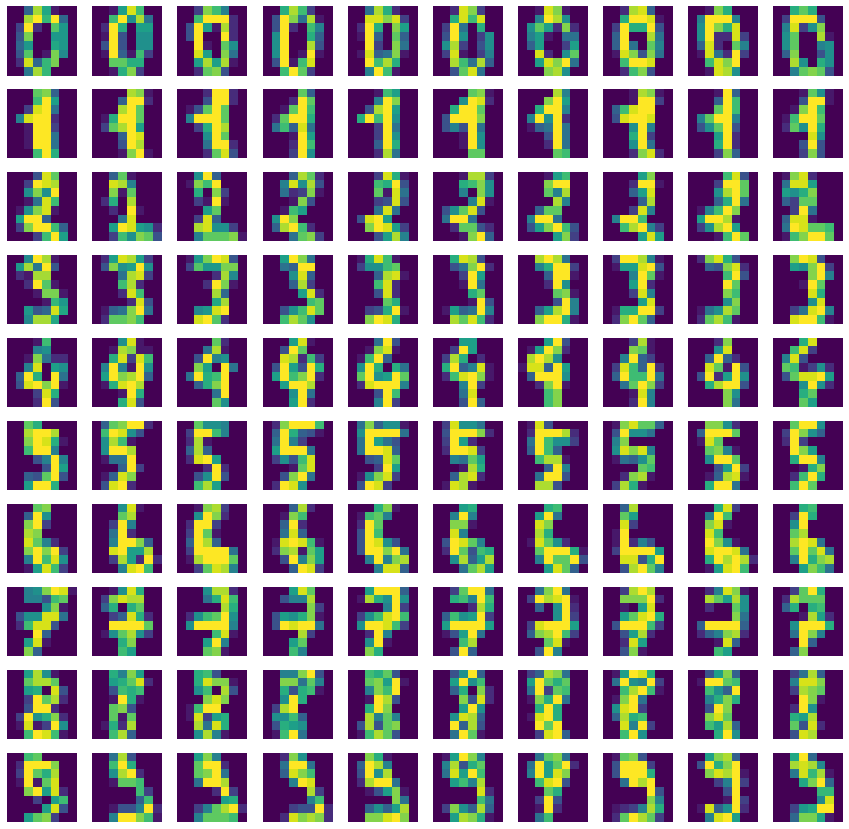

In [20]:
#---------------- AFFICHAGE D'UN ÉCHANTILLON DES IMAGES CONSTITUANT LE DATASET --------------
#
# On peut paramètrer n pour afficher plus ou moins de colonnes
#
#--------------------------------------------------------------------------------------------

n= 10
fig, axs = plt.subplots(len(nom_label), n, figsize=(15, 15))
for i, d in enumerate(nom_label):
    for j in range(n):
        # permet d'afficher sur une même ligne 'M' image représentant le même chiffre
        axs[i,j].imshow(img8x8[label_image == d][j])
        axs[i,j].axis('off')


In [21]:
#----------- MODÈLE CHOISI POUR UN ALGO D'APPRENTISSAGE NON SUPERVISÉ: K-MEANS --------------
#
# On affiche les résultats de ce modèle.... pas ouf!
#
#--------------------------------------------------------------------------------------------

modelKM = KMeans(n_clusters= 10)
modelKM.fit(img64)
prediction= modelKM.predict(img64)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(label_image, prediction))
print("Completeness: %0.3f" % metrics.completeness_score(label_image, prediction))
print("V-measure: %0.3f" % metrics.v_measure_score(label_image, prediction))
print("ARI: Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(label_image, prediction))
print("AMI: Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(label_image, prediction))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(img64, prediction, metric='sqeuclidean'))
print("Inertia: %0.3f"
      % modelKM.inertia_)

Homogeneity: 0.741
Completeness: 0.750
V-measure: 0.746
ARI: Adjusted Rand Index: 0.670
AMI: Adjusted Mutual Information: 0.743
Silhouette Coefficient: 0.302
Inertia: 1165179.838


In [22]:
#----------------------------- SKLEARN: ETUDE DES DIGITS ------------------------------------
#
# CODE A ETUDIER
#
#--------------------------------------------------------------------------------------------

def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [23]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.212s	69485	0.613	0.660	0.636	0.482	0.632	0.144
random   	0.080s	69952	0.545	0.616	0.578	0.415	0.574	0.141
PCA-based	0.033s	72686	0.636	0.658	0.647	0.521	0.643	0.128
__________________________________________________________________________________


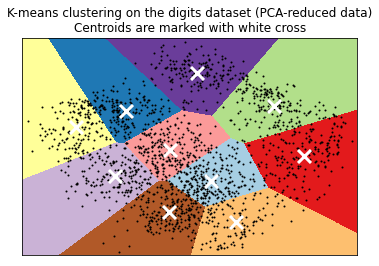

In [24]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Utilisation de KMeans sur des données textes  
  
Nous souhaitons utiliser le clustering (et dont Kmeans) pour analyser les données texte annoté (émotions) en notre possessions et identifier les documents anormaux et obtenir des piste pour améliorer les résultats de classification.

En commençant par le premier jeux de donnée (le plus petit)

1. Est-que les clusters obtenue avec kmeans reflete les groupements de texte par émotions ?
2. comparer les résultats de plusieurs modéles dans un tableaux avec le temps, l'inertie, la NMI, la AMI, l'ARI Index et la silhouette.
3. quelle est le nombre de cluster optimal au regard de la métrique "silhouette" ? de l'inertie ?  est ce que l'inertie est corrélé à la mesure de silhouette ?
4. reproduire ces expériences avec le jeux de donnée 2.
5. Peut-on identifier des cluster de documents ou des émotion difficile à classifier ? (ie cluster non homogéne)


In [25]:
#------------------------------- ROUE DES ÉMOTIONS ------------------------------------------
#
# Liste des emotions: 'sadness' 'anger' 'love' 'surprise' 'fear' 'happy'
# Colonnes: Text, Emotion 
#
#--------------------------------------------------------------------------------------------
def verif(chaine,form= ''):
    print(form,chaine)

data_emo= pds.read_csv('./data/Emotion_final.csv')

xtext= data_emo.Text
yemo= data_emo.Emotion
yemo_code= yemo.replace(['sadness','anger','love','surprise','fear','happy'],[1,2,3,4,5,6])
yemo_code= np.array(yemo_code)

#verif(yemo_code)

In [26]:
# Vobabulary analysis
vect = CountVectorizer()
vect_transform = vect.fit_transform(xtext)
mots = vect.get_feature_names()
#verif(mots)
#type(vect_transform)

In [27]:
#---------------------------- DÉTERMINATION DU NOMBRE DE CLUSTER ----------------------------
#
# Elbow Method
#
#--------------------------------------------------------------------------------------------

inertie = []
K_range = range(1, 20)
for k in K_range:
    modelKM = KMeans(n_clusters=k).fit(vect_transform)
    inertie.append(modelKM.inertia_)
    

Text(0, 0.5, 'Cout du modele (Inertia)')

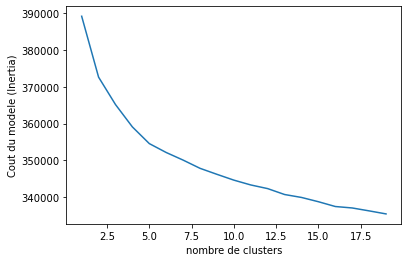

In [14]:
# La méthode du coude est longue, on sort l'affichage pour pouvoir le retravailler

plt.plot(K_range, inertie)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

In [15]:
point_coude = KneeLocator(range(1, 20), inertie, curve="convex", direction="decreasing")

print("point_coude = ",point_coude.elbow)

print("On adaptera le nombre de cluster au nombre d'émotions dans le dataset. La méthode du coude \
valide ce choix et donne 5 (au lieu de 6)... mais ce n'est qu'une approximation.")

point_coude =  5
On adaptera le nombre de cluster au nombre d'émotions dans le dataset. La méthode du coude valide ce choix et donne 5 (au lieu de 6)... mais ce n'est qu'une approximation.


In [16]:
model = KMeans(n_clusters= 6).fit(vect_transform)

prediction= model.predict(vect_transform)


In [18]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(yemo_code, prediction))
print("Completeness: %0.3f" % metrics.completeness_score(yemo_code, prediction))
print("V-measure: %0.3f" % metrics.v_measure_score(yemo_code, prediction))
print("ARI: Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(yemo_code, prediction))
print("AMI: Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(yemo_code, prediction))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(yemo_code.reshape(-1,1), 
        prediction, metric='sqeuclidean'))

print("Inertia: %0.3f"% model.inertia_)


Homogeneity: 0.004
Completeness: 0.004
V-measure: 0.004
ARI: Adjusted Rand Index: 0.005
AMI: Adjusted Mutual Information: 0.004
Silhouette Coefficient: -0.065
Inertia: 351874.673


## Les résultats sont très mauvais, L'algorithme n'est donc pas adapté a ce type de données